# k-Nearest Neighbors

It is the simplest machine learning algorithm which builds a model by storing the dataset and predicts for a new data point by simple finding the closest data points in the training dataset - its "nearest neighbors".

In the simplest way it considers just 1 nearest neighbor (k = 1) and considers this as the output of our data point.

In [1]:
import mglearn

C:\Users\eshub\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


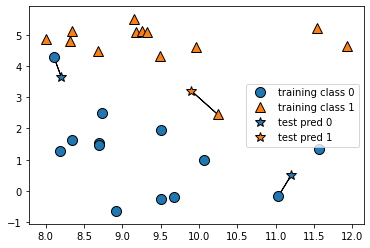

In [2]:
# For number of neighbors equal to 1
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\eshub\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


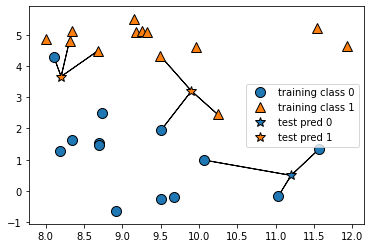

In [3]:
# For number of neighbors equal to 3

mglearn.plots.plot_knn_classification(n_neighbors=3)

In [5]:
from mglearn.datasets import make_forge
from sklearn.model_selection import train_test_split

In [6]:
x, y = make_forge()
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

C:\Users\eshub\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [7]:
# Importing the KNN from sklearn library and setting parameters

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [8]:
# Fitting the model on the dataset

clf.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [9]:
# Making the test set predictions

print("\nTest set predictions {}".format(clf.predict(x_test)))


Test set predictions [1 0 1 0 1 0 0]


In [10]:
# Checking the test set accuracy

print("\nTest set accuracy {:.2f}".format(clf.score(x_test, y_test)))


Test set accuracy 0.86


In [11]:
import matplotlib.pyplot as plt

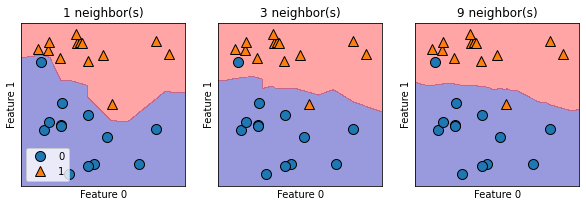

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, fill=True, eps=0.5, 
                                    ax=ax, alpha=.4)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax = ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)

Graphs to demonstrate the smoothness of the boundaries between the two sets 
of points and the boundary keeps getting smooth as the number of neighbors 
increase. A smoother graph means a simple model. 


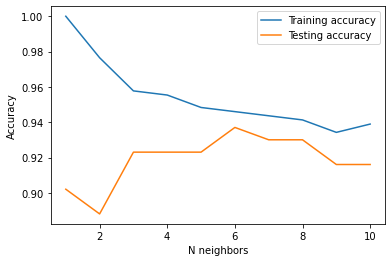

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify=cancer.target,
                                                   random_state=66)
train_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    train_accuracy.append(clf.score(x_train, y_train))
    test_accuracy.append(clf.score(x_test, y_test))

plt.plot(neighbors_settings, train_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Testing accuracy")
plt.ylabel("Accuracy")
plt.xlabel("N neighbors")
plt.legend()